In [39]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [40]:
# Load the dataset directly from seaborn
titanic = sns.load_dataset('titanic')

# Show first few rows
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [41]:
# Keep only useful columns
titanic_clean = titanic[['survived','pclass','sex','age','sibsp','parch','fare','embarked']].copy()

# Handle missing values safely
titanic_clean['age'] = titanic_clean['age'].fillna(titanic_clean['age'].median())
titanic_clean['embarked'] = titanic_clean['embarked'].fillna(titanic_clean['embarked'].mode()[0])

# Convert categorical columns to numeric
titanic_clean['sex'] = titanic_clean['sex'].map({'male': 0, 'female': 1})
titanic_clean = pd.get_dummies(titanic_clean, columns=['embarked'], drop_first=True)

# Add custom features
titanic_clean['FamilySize'] = titanic_clean['sibsp'] + titanic_clean['parch']
titanic_clean['IsAlone'] = titanic_clean['FamilySize'].apply(lambda x: 1 if x==0 else 0)

# Quick check
titanic_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked_Q,embarked_S,FamilySize,IsAlone
0,0,3,0,22.0,1,0,7.2500,False,True,1,0
1,1,1,1,38.0,1,0,71.2833,False,False,1,0
2,1,3,1,26.0,0,0,7.9250,False,True,0,1
3,1,1,1,35.0,1,0,53.1000,False,True,1,0
4,0,3,0,35.0,0,0,8.0500,False,True,0,1


In [42]:
# Add FamilySize
titanic_clean['FamilySize'] = titanic['sibsp'] + titanic['parch']

# Add IsAlone
titanic_clean['IsAlone'] = titanic_clean['FamilySize'].apply(lambda x: 1 if x==0 else 0)

# Quick check
titanic_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked_Q,embarked_S,FamilySize,IsAlone
0,0,3,0,22.0,1,0,7.2500,False,True,1,0
1,1,1,1,38.0,1,0,71.2833,False,False,1,0
2,1,3,1,26.0,0,0,7.9250,False,True,0,1
3,1,1,1,35.0,1,0,53.1000,False,True,1,0
4,0,3,0,35.0,0,0,8.0500,False,True,0,1


In [43]:
# Separate features and target
X = titanic_clean.drop('survived', axis=1)
y = titanic_clean['survived']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7988826815642458

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



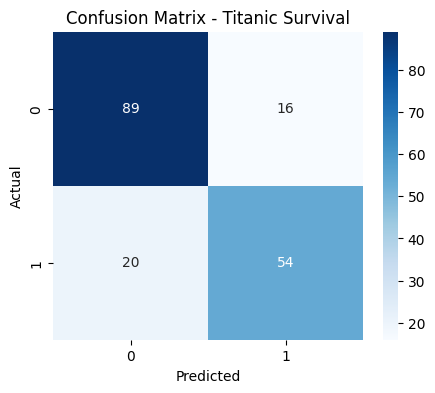

In [44]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Titanic Survival')
plt.show()

In [45]:
# Convert to DataFrame with same columns as training data
new_passenger_df = pd.DataFrame(new_passenger, columns=X.columns)

# Predict
prediction = model.predict(new_passenger_df)

if prediction[0] == 1:
    print("The passenger would survive ✅")
else:
    print("The passenger would not survive ❌")

The passenger would not survive ❌
